In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.cluster import KMeans
from datetime import datetime

Import semua library yang digunakan

In [25]:
data_customer = pd.read_csv('dataset/Case Study - Customer.csv', delimiter=';')
data_product = pd.read_csv('dataset/Case Study - Product.csv',delimiter=';')
data_store = pd.read_csv('dataset/Case Study - Store.csv',delimiter=';')
data_transaction = pd.read_csv('dataset/Case Study - Transaction.csv',delimiter=';')

Import semua data yang diperlukan

In [26]:
data_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


Mengecek tipe data yang digunakan pada dataset customer

In [27]:
data_customer['Income'] = data_customer['Income'].str.replace(',', '.', regex=True).astype(float)
data_customer['Income']

0       5.12
1       6.23
2       9.17
3       4.87
4       3.57
       ...  
442     9.28
443    15.31
444    14.48
445     7.81
446    20.37
Name: Income, Length: 447, dtype: float64

Mengubah tipe data Income dari object menjadi float, dan melakukan replace pada isi kolumn yang memuat karakter , diubah menjadi .

In [28]:
data_customer.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

Mengecek adanya data yang kosong atau NaN, dan terdapat nilai NaN pada kolumn 'Marital Status'

In [29]:
data_customer.dropna()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,5.12
1,2,60,1,Married,6.23
2,3,32,1,Married,9.17
3,4,31,1,Married,4.87
4,5,58,1,Married,3.57
...,...,...,...,...,...
441,442,42,1,Married,14.88
443,444,53,0,Married,15.31
444,445,51,0,Married,14.48
445,446,57,0,Married,7.81


Menghapus data yang berisi NaN

In [30]:
data_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


Mengecek tipe data yang digunakan pada dataset product

In [31]:
data_product = data_product.rename(columns={'Product Name': 'ProductName'})
data_product

,ProductID,ProductName,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200
5,P6,Cashew,18000
6,P7,Coffee Candy,9400
7,P8,Oat,16000
8,P9,Yoghurt,10000
9,P10,Cheese Stick,15000


Melakukan rename column pada Product Name

In [32]:
data_product.isnull().sum()

ProductID      0
ProductName    0
Price          0
dtype: int64

Mengecek data yang berisikan NaN

In [33]:
data_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


Mengecek tipe data yang digunakan pada dataset store

In [34]:
data_store['Latitude'] = data_store['Latitude'].str.replace(',', '.', regex=True).astype(float)
data_store['Longitude'] = data_store['Longitude'].str.replace(',', '.', regex=True).astype(float)
data_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StoreID     14 non-null     int64  
 1   StoreName   14 non-null     object 
 2   GroupStore  14 non-null     object 
 3   Type        14 non-null     object 
 4   Latitude    14 non-null     float64
 5   Longitude   14 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 800.0+ bytes


Mengubah tipe data 'Latitude', 'Longitude' dari object menjadi float, dan melakukan replace pada isi kolumn yang memuat karakter , diubah menjadi .

In [35]:
data_store.isnull().sum()

StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64

Mengecek data yang berisikan NaN

In [36]:
data_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


Mengecek tipe data yang digunakan pada dataset transaction

In [37]:
data_transaction['Date'] = pd.to_datetime(data_transaction['Date'], format='%d/%m/%Y')
data_transaction

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,2022-01-01,P3,7500,4,30000,12
1,TR16356,165,2022-01-01,P9,10000,7,70000,1
2,TR1984,183,2022-01-01,P1,8800,4,35200,4
3,TR35256,160,2022-01-01,P1,8800,7,61600,4
4,TR41231,386,2022-01-01,P9,10000,1,10000,4
...,...,...,...,...,...,...,...,...
5015,TR54423,243,2022-12-31,P10,15000,5,75000,3
5016,TR5604,271,2022-12-31,P2,3200,4,12800,9
5017,TR81224,52,2022-12-31,P7,9400,6,56400,9
5018,TR85016,18,2022-12-31,P8,16000,3,48000,13


Mengubah tipe data 'Date' dari object menjadi datetime

In [38]:
data_transaction.isnull().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

Mengecek data yang berisikan NaN

In [39]:
full_data = data_transaction.merge(data_product, on='ProductID').merge(data_store, on='StoreID').merge(data_customer, on='CustomerID')
full_data

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,ProductName,Price_y,StoreName,GroupStore,Type,Latitude,Longitude,Age,Gender,Marital Status,Income
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,36,0,Married,10.53
1,TR56601,328,2022-12-24,P9,10000,1,10000,9,Yoghurt,10000,Lingga,Lingga,Modern Trade,-3.654703,128.190643,36,0,Married,10.53
2,TR89012,328,2022-03-25,P5,4200,5,21000,6,Thai Tea,4200,Lingga,Lingga,Modern Trade,-5.135399,119.423790,36,0,Married,10.53
3,TR67395,328,2022-01-22,P8,16000,3,48000,11,Oat,16000,Sinar Harapan,Prestasi,General Trade,0.533505,101.447403,36,0,Married,10.53
4,TR45738,328,2022-12-29,P2,3200,3,9600,11,Ginger Candy,3200,Sinar Harapan,Prestasi,General Trade,0.533505,101.447403,36,0,Married,10.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR93855,387,2022-11-28,P5,4200,3,12600,11,Thai Tea,4200,Sinar Harapan,Prestasi,General Trade,0.533505,101.447403,36,0,Married,9.10
5016,TR83113,387,2022-07-19,P5,4200,2,8400,5,Thai Tea,4200,Bonafid,Gita,General Trade,-7.250445,112.768845,36,0,Married,9.10
5017,TR92378,387,2022-10-20,P7,9400,2,18800,5,Coffee Candy,9400,Bonafid,Gita,General Trade,-7.250445,112.768845,36,0,Married,9.10
5018,TR39280,387,2022-11-06,P7,9400,4,37600,1,Coffee Candy,9400,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666,36,0,Married,9.10


Menggabungkan data yang beririskan dari data transaction, product, store, customer

In [40]:
new_df = full_data.groupby('Date').agg({'Qty': 'sum'}).reset_index()
new_df

,Date,Qty
0,2022-01-01,49
1,2022-01-02,59
2,2022-01-03,63
3,2022-01-04,45
4,2022-01-05,30
...,...,...
360,2022-12-27,70
361,2022-12-28,68
362,2022-12-29,42
363,2022-12-30,44


Mengambil data Date, dan Qty yang dijumlahkan menjadi sebuah dataset baru

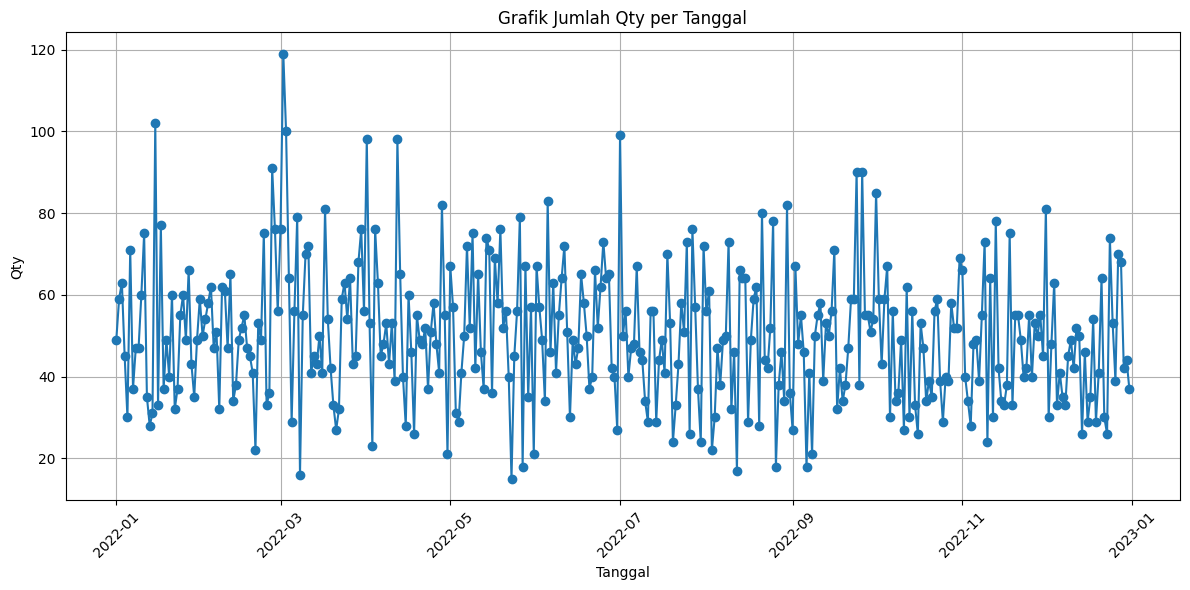

In [41]:
import matplotlib.pyplot as plt

# Membuat grafik
plt.figure(figsize=(12, 6))  # Mengatur ukuran plot

# Menggambar grafik garis (line plot) untuk data 'Qty' terhadap tanggal 'Date'
plt.plot(new_df['Date'], new_df['Qty'], marker='o', linestyle='-')

# Menambahkan label sumbu x dan y, serta judul grafik
plt.xlabel('Tanggal')
plt.ylabel('Qty')
plt.title('Grafik Jumlah Qty per Tanggal')

# Menampilkan grafik
plt.grid(True)  # Menampilkan grid
plt.xticks(rotation=45)  # Memutar label tanggal agar lebih mudah dibaca
plt.tight_layout()  # Mengatur tata letak agar tidak ada pemotongan label
plt.show()

Grafik menunjukkan pergerakan Qty tiap harinya, dan dilihat bahwa Qty terendah dibawah 20 pada beberapa hari dan mencapai jumlah Qty perhari 100

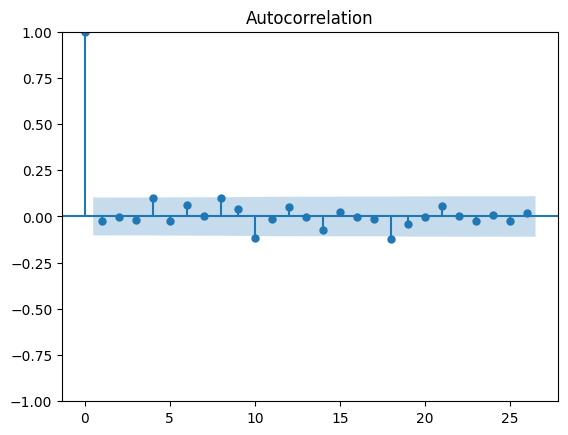

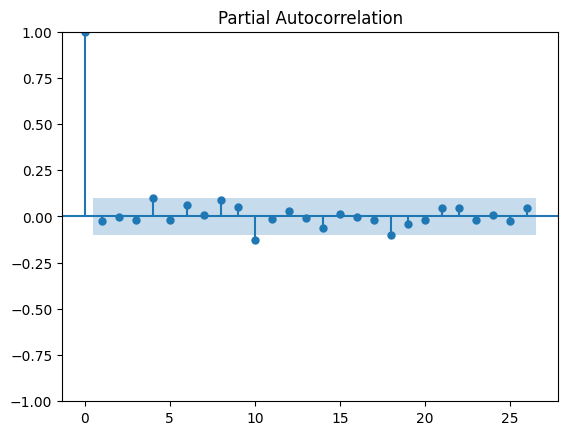

In [42]:
# Langkah 4: Identifikasi Parameter Model ARIMA
# Gunakan plot ACF dan PACF untuk mengidentifikasi parameter ARIMA.
plot_acf(new_df['Qty'])
plot_pacf(new_df['Qty'])
plt.show()


Grafik menunjukkan bahwa 

c:\Users\ABDAN\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\ABDAN\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Hasil Peramalan:
365    53.660605
366    57.639281
367    56.636893
368    46.381897
369    75.078016
         ...    
460    44.347287
461    61.161027
462    44.523552
463    67.118725
464    42.274848
Name: predicted_mean, Length: 100, dtype: float64


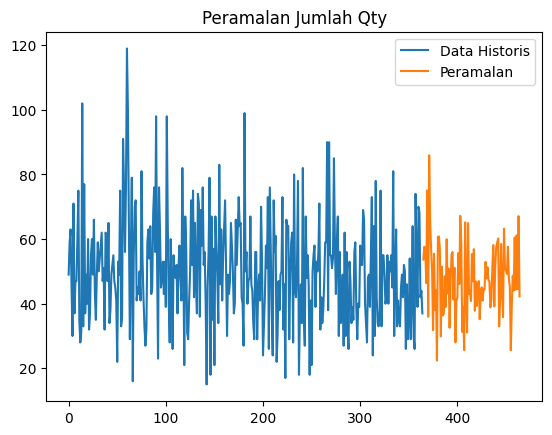

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Membagi data menjadi data pelatihan dan data pengujian
train_data = new_df['Qty']
test_data = new_df['Qty'][-100:]  # Gunakan 7 data terakhir untuk pengujian

# Membuat model ARIMA
p, d, q = 100, 0, 100  # Parameter ARIMA yang sesuai
model = ARIMA(train_data, order=(p, d, q))
results = model.fit()

# Melakukan peramalan ke depan
forecast_steps =  100 # Prediksi 7 langkah ke depan (7 hari)
future_forecast = results.forecast(steps=forecast_steps)

# Hasil peramalan
print("Hasil Peramalan:")
print(future_forecast)


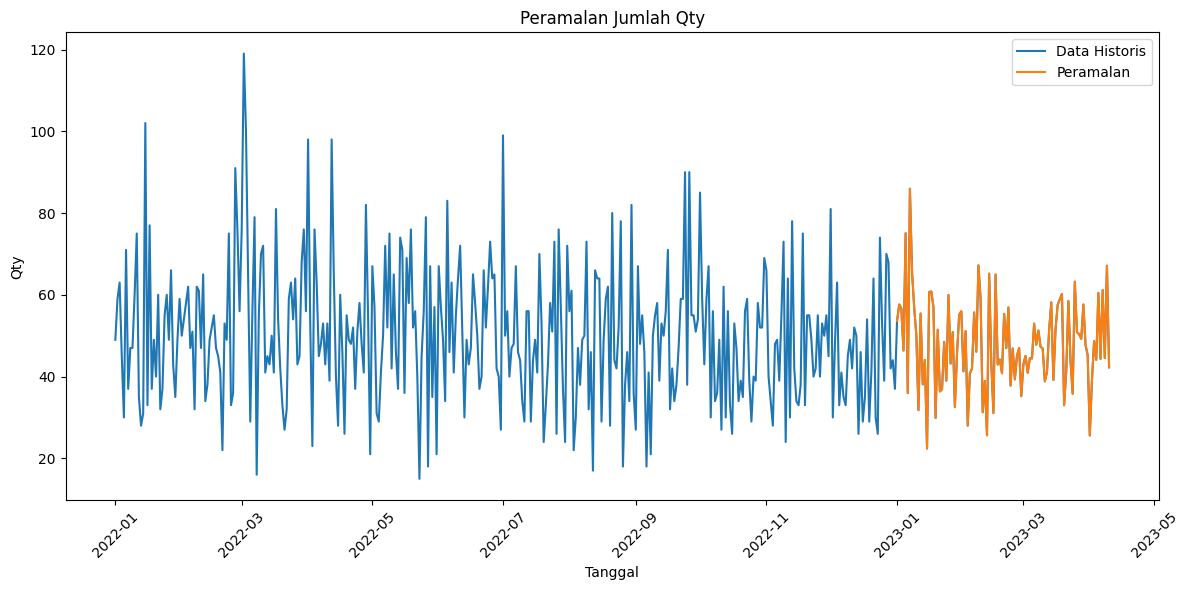

In [98]:
# Membuat DataFrame baru untuk hasil peramalan
forecast_dates = pd.date_range(start='2023-01-01', periods=len(future_forecast), freq='D')
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Qty': future_forecast})

# Menggabungkan DataFrame hasil peramalan dengan DataFrame data historis
merged_df = pd.concat([new_df, forecast_df], ignore_index=True)

# Plot grafik data historis dan hasil peramalan
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], merged_df['Qty'], label='Data Historis')
plt.plot(merged_df['Date'][365:], merged_df['Qty'][365:], label='Peramalan')
plt.legend()
plt.title('Peramalan Jumlah Qty')
plt.xlabel('Tanggal')
plt.ylabel('Qty')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [100]:
merged_df[-100:].to_csv('data_prediksi.csv', index=False)

Hasil prediksi datanya kita lakukan download untuk melihat lebih jelasnya

In [44]:

# Data aktual
actual_data = new_df['Qty'][-100:]  # Data aktual untuk 100 data terakhir, sesuai dengan data pengujian

# Hitung MSE (Mean Squared Error)
mse = mean_squared_error(actual_data, future_forecast)

# Hitung RMSE (Root Mean Squared Error)
rmse = math.sqrt(mse)

# Hasil RMSE
print("RMSE:", rmse)


RMSE: 16.66654873852532


hasil output dari RMSE menunjukkan bahwa 16,666 adalah kesalahan dalam melakukan prediksi pada data aslinya. Semakin nilai RMSE kecil maka semakin baik model prediksi yang digunakan

In [51]:
new_df2 = full_data.groupby('CustomerID').agg({'TransactionID': 'count','Qty':'sum','TotalAmount':'sum'}).reset_index()
new_df2

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
442,443,16,59,485100
443,444,18,62,577700
444,445,18,68,587200
445,446,11,42,423300


c:\Users\ABDAN\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ABDAN\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ABDAN\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ABDAN\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\

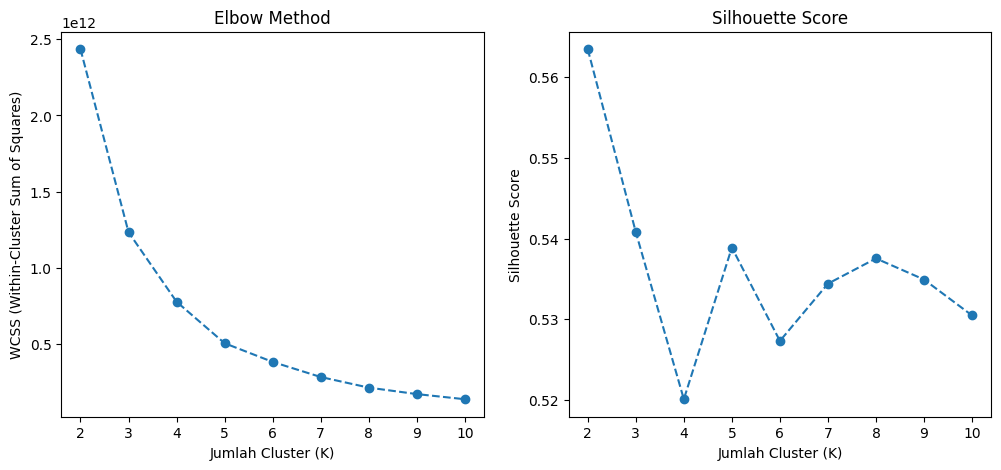

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Siapkan data Anda (data dalam bentuk NumPy array atau DataFrame pandas)
X = new_df2[[ 'CustomerID','TransactionID', 'Qty', 'TotalAmount']]


# Uji berbagai nilai K untuk elbow method
wcss = []  # WCSS (Within-Cluster Sum of Squares)
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot elbow method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')

# Plot silhouette score
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Silhouette Score')

plt.show()


Mencari banyaknya k atau jumlah cluster dengan metode elbow atau silhoutte. Apabila koefisien dari koefisien tersebut terbesar maka yang optimal maka itulah jumlah cluster yang akan diambil k=2. tetapi jika metode elbow yaitu mencari titik yang mulai melambat yaitu pada k=3. Sehingga kita mengambil k atau jumlah clusternya adalah 3

c:\Users\ABDAN\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


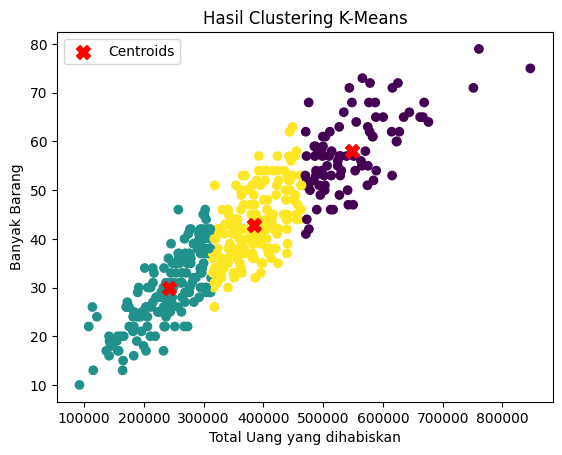

In [47]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Siapkan data Anda dalam DataFrame Pandas
X = new_df2[['CustomerID','TransactionID', 'Qty', 'TotalAmount']]

# Buat model K-Means dengan jumlah cluster (K) yang telah ditentukan
k = 3  # Ganti dengan jumlah cluster yang Anda anggap optimal
kmeans = KMeans(n_clusters=k, random_state=0)

# Latih model K-Means
kmeans.fit(X)

# Dapatkan label kluster untuk setiap data point
new_df2['cluster'] = kmeans.labels_

# Dapatkan pusat kluster
cluster_centers = kmeans.cluster_centers_

# Visualisasikan hasil clustering
plt.scatter(X['TotalAmount'],X['Qty'], c=new_df2['cluster'], cmap='viridis')
plt.scatter(cluster_centers[:, 3], cluster_centers[:, 2], c='red', marker='X', s=100, label='Centroids')
plt.xlabel('Total Uang yang dihabiskan')
plt.ylabel('Banyak Barang')
plt.legend()
plt.title('Hasil Clustering K-Means')
plt.show()


Grafik di atas menggambarkan tiap tiap data mengumpul membentuk sebuah cluster, sehingga kita dapat melihat data mana saja yang masuk kedalam cluster tersebut dan lebih memudahkan dalam melakukan promosi pada kelompok tersebut.

In [48]:
new_df2

,CustomerID,TransactionID,Qty,TotalAmount,cluster
0,1,17,60,623300,0
1,2,13,57,392300,2
2,3,15,56,446200,2
3,4,10,46,302500,1
4,5,7,27,268600,1
...,...,...,...,...,...
442,443,16,59,485100,0
443,444,18,62,577700,0
444,445,18,68,587200,0
445,446,11,42,423300,2


In [49]:
# Filter pelanggan berdasarkan kluster
cluster_0_customers = new_df2[new_df2['cluster'] == 0]
cluster_1_customers = new_df2[new_df2['cluster'] == 1]
cluster_2_customers = new_df2[new_df2['cluster'] == 2]

# Tampilkan pelanggan dalam masing-masing kluster
print("Pelanggan dalam Kluster 0:")
print(cluster_0_customers)

print("\nPelanggan dalam Kluster 1:")
print(cluster_1_customers)

print("\nPelanggan dalam Kluster 2:")
print(cluster_2_customers)


Pelanggan dalam Kluster 0:
     CustomerID  TransactionID  Qty  TotalAmount  cluster
0             1             17   60       623300        0
6             7             17   57       498800        0
7             8             14   47       542100        0
9            10             14   50       478000        0
11           12             16   61       582500        0
..          ...            ...  ...          ...      ...
429         430             14   53       501600        0
433         434             13   57       509900        0
442         443             16   59       485100        0
443         444             18   62       577700        0
444         445             18   68       587200        0

[90 rows x 5 columns]

Pelanggan dalam Kluster 1:
     CustomerID  TransactionID  Qty  TotalAmount  cluster
3             4             10   46       302500        1
4             5              7   27       268600        1
10           11              7   28       247300    

In [50]:
# Buat DataFrame dengan rata-rata setiap fitur dalam setiap klaster, tanpa mengikutsertakan 'customerID'
cluster_means = new_df2[['Qty','TotalAmount']].groupby(new_df2['cluster']).mean()

# Cetak rata-rata fitur dalam setiap kluster
print("Rata-Rata Fitur dalam Setiap Kluster:")
print(cluster_means)


Rata-Rata Fitur dalam Setiap Kluster:
               Qty    TotalAmount
cluster                          
0        58.088889  548162.222222
1        29.888889  241425.730994
2        42.779570  384003.225806


Rata-rata Qty dan TotalAmount dari masing-masing cluster agar lebih memudahkan dalam mencapai target yang diinginkan